# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics for the two artists you selected in Module 1 and the Twitter descriptions pulled for Robyn and Cher. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


/Users/cfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/cfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/Users/cfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# pip install wordcloud

In [3]:
# Use this space for any additional import statements you need



In [4]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")


all_language_emojis = set()

for country in emoji.EMOJI_DATA : 
    for em in emoji.EMOJI_DATA[country] : 
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """

    # Place your Module 2 solution here
    
    # Function for the descriptive stats
def descriptive_stats(tokens_list, num_common=10):
    # Flatten the list of lists into a single list of tokens
    all_tokens = [token for sublist in tokens_list for token in sublist]
    
    # Calculate
    num_tokens = len(all_tokens)
    unique_tokens = set(all_tokens)
    num_unique_tokens = len(unique_tokens)
    num_characters = sum(len(token) for token in all_tokens)
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens else 0
    
    # Most common tokEns 
    most_common_tokens = Counter(all_tokens).most_common(num_common)
    
    # Print the statistics
    print(f"Number of tokens: {num_tokens}")
    print(f"Number of unique tokens: {num_unique_tokens}")
    print(f"Number of characters: {num_characters}")
    print(f"Lexical diversity: {lexical_diversity:.2f}")
    print(f"Most common tokens: {most_common_tokens}")
    
    # Return the statistics as a list
    return [num_tokens, num_unique_tokens, lexical_diversity, num_characters]
    

    
def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # modify this function to remove stopwords
    return(tokens)
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    # modify this function to return tokens
    return(text)

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [5]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer

data_location = "/Users/cfitzpatrick/Downloads/M1 Results 2" # change to your location if it is not in the same directory as your notebook
twitter_folder = "/twitter/"
lyrics_folder = "/lyrics/"

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [6]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"

In [7]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

In [8]:
nan_count = twitter_data['description'].isna().sum()
print("Number of NaNs in the description column:", nan_count)

Number of NaNs in the description column: 2162231


In [9]:
twitter_data

,screen_name,name,id,location,followers_count,friends_count,description,artist
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher
...,...,...,...,...,...,...,...,...
358367,jakegiles,Jake Giles,19725102,LA,7690,2165,"singer of songs, type 1 diabetic, tired $jakel...",robyn
358368,axelbluhme,Axel Bluhme,19573759,DK,238,1565,Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...,robyn
358369,RayRayRay27,Rachael :),19919217,Oldham,762,1479,A year to change a life is still a year ✨😌,robyn
358370,bhandberg,Ben Handberg,12642462,Sydney,432,593,Head of Consumer - Mango. Made in Melbourne. R...,robyn


In [10]:
# import os

# # Define data locations
# data_location = "/Users/cfitzpatrick/Downloads/M1 Results 2"
# lyrics_folder = "lyrics"

# # Define artist folders and their corresponding files
# artist_files2 = {
#     'cher': 'cher',
#     'robyn': 'robyn'
# }

# # Function to read lyrics files for an artist
# def read_lyrics(artist):
#     artist_folder = os.path.join(data_location, lyrics_folder, artist)
#     print("Artist Folder:", artist_folder)  # Print the artist folder path
#     if not os.path.exists(artist_folder):
#         print(f"Folder '{artist_folder}' does not exist.")
#         return {}
#     lyrics = {}
#     for file_name in os.listdir(artist_folder):
#         print("File in folder:", file_name)  # Print the file names in the folder
#         if file_name.endswith('.txt'):
#             with open(os.path.join(artist_folder, file_name), 'r') as file:
#                 title = os.path.splitext(file_name)[0]  # Extract title from file name
#                 lyrics[title] = file.read()
#     return lyrics

# # Read lyrics data for Cher
# cher_lyrics = read_lyrics(artist_files2['cher'])

# # Read lyrics data for Robyn
# robyn_lyrics = read_lyrics(artist_files2['robyn'])

# combined_lyrics = pd.concat([read_lyrics(artist_files2['cher']), read_lyrics(artist_files2['robyn'])], ignore_index=True)



In [11]:
import os
import pandas as pd

# Define data locations
data_location = "/Users/cfitzpatrick/Downloads/M1 Results 2"
lyrics_folder = "lyrics"

# Define artist folders and their corresponding files
artist_files2 = {
    'cher': 'cher',
    'robyn': 'robyn'
}

# Function to read lyrics files for an artist
def read_lyrics(artist):
    artist_folder = os.path.join(data_location, lyrics_folder, artist)
    if not os.path.exists(artist_folder):
        print(f"Folder '{artist_folder}' does not exist.")
        return {}
    lyrics = {}
    for file_name in os.listdir(artist_folder):
        if file_name.endswith('.txt'):
            with open(os.path.join(artist_folder, file_name), 'r') as file:
                title = os.path.splitext(file_name)[0]  # Extract title from file name
                lyrics[title] = file.read()
    return lyrics

# Read lyrics data for Cher
cher_lyrics = read_lyrics(artist_files2['cher'])

# Read lyrics data for Robyn
robyn_lyrics = read_lyrics(artist_files2['robyn'])

# Convert the lyrics dictionaries to dataframes
cher_df = pd.DataFrame(list(cher_lyrics.items()), columns=['Title', 'Lyrics'])
robyn_df = pd.DataFrame(list(robyn_lyrics.items()), columns=['Title', 'Lyrics'])

# Add a column to identify the artist
cher_df['Artist'] = 'Cher'
robyn_df['Artist'] = 'Robyn'

# Combine the dataframes
combined_lyrics = pd.concat([cher_df, robyn_df], ignore_index=True)

# If you need to see the combined DataFrame, you can use:
# print(combined_lyrics)

# Save combined lyrics to a new file if needed
combined_lyrics.to_csv(os.path.join(data_location, 'combined_lyrics.csv'), index=False)


In [13]:
combined_lyrics

,Title,Lyrics,Artist
0,cher_comeandstaywithme,"""Come And Stay With Me""\n\n\n\nI'll send away ...",Cher
1,cher_pirate,"""Pirate""\n\n\n\nHe'll sail on with the summer ...",Cher
2,cher_stars,"""Stars""\n\n\n\nI was never one for saying what...",Cher
3,cher_thesedays,"""These Days""\n\n\n\nWell I've been out walking...",Cher
4,cher_lovesohigh,"""Love So High""\n\n\n\nEvery morning I would wa...",Cher
...,...,...,...
415,robyn_doyoureallywantmeshowrespect,"""Do You Really Want Me (Show Respect)""\n\n\n\n...",Robyn
416,robyn_thelasttime,"""The Last Time""\n\n\n\nEver since I was a litt...",Robyn
417,robyn_missingu,"""Missing U""\n\n\n\nBaby, it's so weird to me n...",Robyn
418,robyn_breakdownintermission,"""Breakdown Intermission""\n\n\n\nHey my friend ...",Robyn


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove stopwords (optional)
* Remove punctuation
* Split on whitespace

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you. Note that we remove stopwords before removing punctuation because the stopword set includes punctuation.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove stopwords
* Remove punctuation other than emojis or hashtags
* Split on whitespace

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [14]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# import string

# # Download necessary NLTK resources
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')

# def tokenize_and_normalize_lyrics(lyrics):
#     tokenized_lyrics = []
    
#     # Get English stopwords
#     stop_words = set(stopwords.words('english'))
#     lemmatizer = WordNetLemmatizer()
    
#     for title, lyric_text in lyrics.items():
#         # Remove punctuation
#         lyric_text = ''.join([char for char in lyric_text if char not in string.punctuation])
        
#         # Casefold to lowercase and split by whitespace
#         tokens = lyric_text.lower().split()
        
#         # Remove stopwords
#         tokens = [token for token in tokens if token not in stop_words]
        
#         # Apply lemmatization
#         tokens = [lemmatizer.lemmatize(token) for token in tokens]
        
#         # Filter out single-letter tokens
#         tokens = [token for token in tokens if len(token) > 1]
        
#         # Add to tokenized_lyrics list
#         tokenized_lyrics.extend(tokens)
    
#     return tokenized_lyrics

# # Example usage with Cher and Robyn lyrics data
# cher_cleaned_lyrics = tokenize_and_normalize_lyrics(cher_lyrics)
# robyn_cleaned_lyrics = tokenize_and_normalize_lyrics(robyn_lyrics)

In [21]:
import string
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Ensure you have downloaded the necessary NLTK data files
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Define the pipeline functions
def remove_titles(text):
    # Assuming titles are the first line in the lyrics
    return ' '.join(text.split('\n')[1:])

def casefold_text(text):
    return text.casefold()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def split_on_whitespace(text):
    return text.split()

def remove_stop(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

def prepare(text, pipeline):
    for func in pipeline:
        text = func(text)
    return text

# Define the pipeline with stopword removal as optional
include_stopword_removal = True
if include_stopword_removal:
    my_pipeline = [remove_titles, casefold_text, remove_punctuation, split_on_whitespace, remove_stop]
else:
    my_pipeline = [remove_titles, casefold_text, remove_punctuation, split_on_whitespace]

# Assuming combined_lyrics DataFrame is already created and populated with Lyrics
combined_lyrics["tokens"] = combined_lyrics["Lyrics"].apply(prepare, pipeline=my_pipeline)
combined_lyrics["num_tokens"] = combined_lyrics["tokens"].map(len)

# Display the DataFrame
print(combined_lyrics.head())


                    Title                                             Lyrics  \
0  cher_comeandstaywithme  "Come And Stay With Me"\n\n\n\nI'll send away ...   
1             cher_pirate  "Pirate"\n\n\n\nHe'll sail on with the summer ...   
2              cher_stars  "Stars"\n\n\n\nI was never one for saying what...   
3          cher_thesedays  "These Days"\n\n\n\nWell I've been out walking...   
4         cher_lovesohigh  "Love So High"\n\n\n\nEvery morning I would wa...   

  Artist                                             tokens  num_tokens  
0   Cher  [ill, send, away, false, pride, ill, forsake, ...          76  
1   Cher  [hell, sail, summer, wind, blows, day, everybo...         143  
2   Cher  [never, one, saying, really, feel, except, ton...         159  
3   Cher  [well, ive, walking, dont, much, talking, days...          81  
4   Cher  [every, morning, would, wake, id, tie, sun, ar...          87  


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/cfitzpatrick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cfitzpatrick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
twitter_data

,screen_name,name,id,location,followers_count,friends_count,description,artist,tokens,num_tokens,has_emoji
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher,nan,3,False
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,39,False
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらdmします🧡,41,True
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher,csu,3,False
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher,writer washinformer spelmancollege alumna #dcn...,141,False
...,...,...,...,...,...,...,...,...,...,...,...
358367,jakegiles,Jake Giles,19725102,LA,7690,2165,"singer of songs, type 1 diabetic, tired $jakel...",robyn,singer of songs type 1 diabetic tired jakelgil...,67,False
358368,axelbluhme,Axel Bluhme,19573759,DK,238,1565,Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...,robyn,dadx2 conarch photographer dk #stemgrønnest #g...,75,False
358369,RayRayRay27,Rachael :),19919217,Oldham,762,1479,A year to change a life is still a year ✨😌,robyn,a year to change a life is still a year ✨😌,42,True
358370,bhandberg,Ben Handberg,12642462,Sydney,432,593,Head of Consumer - Mango. Made in Melbourne. R...,robyn,head of consumer mango made in melbourne ramb...,62,False


In [29]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

combined_lyrics["tokens"] = combined_lyrics["Lyrics"].apply(prepare,pipeline=my_pipeline)
combined_lyrics["num_tokens"] = combined_lyrics["tokens"].map(len) 

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 


In [17]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis. (I did this above, so no need for this code)

In [18]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
159088,cher,Founder of @dogecoingemz 💎 29🌻Virgo ♍️ RN👩🏻‍⚕️...,founder of dogecoingemz 💎 29🌻virgo ♍️ rn👩🏻‍⚕️z...
395455,cher,so thrilled that the orange blob is gone but I...,so thrilled that the orange blob is gone but i...
2809095,cher,IG: real.eyes.realize💁🏼‍♀️ Snap:bam_1306📸,ig realeyesrealize💁🏼‍♀️ snapbam1306📸
178055,cher,"Cycling, LGBTQ and other stuff that pops in my...",cycling lgbtq and other stuff that pops in my ...
840233,cher,💖🐠🤬💫🙃,💖🐠🤬💫🙃
861387,cher,NBA / formula1 / COSMETICS / makeup / Ru’paul’...,nba formula1 cosmetics makeup ru’paul’s dr...
1521021,cher,Fascinated by the paranormal. Love chocolate. ...,fascinated by the paranormal love chocolate ki...
1270464,cher,"Longtime progressive, old lady, book hoarder, ...",longtime progressive old lady book hoarder yog...
360572,cher,19y// @corinthians // Boo👻,19y corinthians boo👻
749787,cher,♉️♍️♎️ she/her grown lady with ADHD and a blin...,♉️♍️♎️ sheher grown lady with adhd and a blind...


In [19]:
print(twitter_data[twitter_data.has_emoji].sample(10)[["artist", "description", "tokens"]])


        artist                                        description  \
3081752   cher  JB ♥ love him. updates about him. tweets from ...   
1278309   cher                         Best Auntie, it's proven 😄   
2036297   cher  📍 Berlin 📈 Healthcare Tech Startup - Working o...   
1261810   cher  🌧 💿 finding my healing place💿 🌧 digitally spea...   
47659    robyn  🇺🇦♥️🇺🇦 Director of Labs at @movingbrands Relat...   
2890864   cher                                       Musician. ♍️   
2549601   cher  CUENTA OFICIAL Y ÚNICA. PADRE, ACTOR Y EMPRESA...   
1986110   cher                             chef de corazón ❤️️🍫🍝🍴   
108049    cher  My grandkids call me Mimi! Happy wife. Progres...   
553877    cher  “She is worth far more than rubies and pearls....   

                                                    tokens  
3081752  jb ♥ love him updates about him tweets from hi...  
1278309                           best auntie its proven 😄  
2036297  📍 berlin 📈 healthcare tech startup  working on..

In [20]:
# Detect if a Twitter description contains an emoji
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

# Display rows that contain emojis
print(combined_lyrics.head())
print(twitter_data.head())

                    Title                                             Lyrics  \
0  cher_comeandstaywithme  "Come And Stay With Me"\n\n\n\nI'll send away ...   
1             cher_pirate  "Pirate"\n\n\n\nHe'll sail on with the summer ...   
2              cher_stars  "Stars"\n\n\n\nI was never one for saying what...   
3          cher_thesedays  "These Days"\n\n\n\nWell I've been out walking...   
4         cher_lovesohigh  "Love So High"\n\n\n\nEvery morning I would wa...   

  Artist                                             tokens  num_tokens  
0   Cher  come and stay with me\n\n\n\nill send away all...         695  
1   Cher  pirate\n\n\n\nhell sail on with the summer win...        1361  
2   Cher  stars\n\n\n\ni was never one for saying what i...        1554  
3   Cher  these days\n\n\n\nwell ive been out walking \n...         802  
4   Cher  love so high\n\n\n\nevery morning i would wake...         803  
    screen_name          name                   id        location  \
0    

With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: One way I could improve the tokenization is by using context-aware tokenization methods. The approach in this assignment treats each token separately, whereas context-aware tokenization considers the words or phrases around them when dividing text. By taking into account this context, such as the structure of sentences or the meaning of nearby words, we can achieve more accurate tokenization. This can be especially helpful when words have multiple meanings or when boundaries between them are vague. 

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [22]:
# Function to display descriptive statistics
def display_descriptive_statistics(df, artist_name):
    num_tokens = df["num_tokens"].sum()
    unique_tokens = df["tokens"].explode().nunique()
    lexical_diversity = unique_tokens / num_tokens
    total_characters = df["Lyrics"].str.len().sum()

    print(f"Descriptive Statistics for {artist_name}:")
    print(f"Number of tokens: {num_tokens}")
    print(f"Number of unique tokens: {unique_tokens}")
    print(f"Number of characters: {total_characters}")
    print(f"Lexical diversity: {lexical_diversity:.5f}")

    # Display most common tokens
    from collections import Counter

    all_tokens = df["tokens"].explode()
    most_common_tokens = Counter(all_tokens).most_common(10)
    print(f"Most common tokens: {most_common_tokens}\n")

# Separate the DataFrame by artist
cher_lyrics = combined_lyrics[combined_lyrics["Artist"] == "Cher"]
robyn_lyrics = combined_lyrics[combined_lyrics["Artist"] == "Robyn"]

# Display statistics for each artist
display_descriptive_statistics(cher_lyrics, "Cher")
display_descriptive_statistics(robyn_lyrics, "Robyn")

Descriptive Statistics for Cher:
Number of tokens: 35233
Number of unique tokens: 3684
Number of characters: 348570
Lexical diversity: 0.10456
Most common tokens: [('love', 966), ('im', 511), ('know', 480), ('dont', 430), ('youre', 332), ('baby', 315), ('time', 313), ('see', 308), ('oh', 306), ('one', 275)]

Descriptive Statistics for Robyn:
Number of tokens: 15041
Number of unique tokens: 2139
Number of characters: 147777
Lexical diversity: 0.14221
Most common tokens: [('know', 305), ('im', 299), ('dont', 297), ('love', 269), ('got', 249), ('like', 230), ('baby', 220), ('youre', 169), ('never', 155), ('dance', 148)]



Q: what observations do you make about these data? 

A: I am sure that I could have filtered the stopwords a bit better, but both Cher and Robyn like songs about love, and they use "don't" a lot, and baby as well. Baby and love are obviously used for affectionate songs, and maybe don't is used alot in a plantive way. Robyn has slightly higher lyrical diversity. 


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

### For lyrics

In [24]:
# Define the function to calculate concentration ratios
def calculate_concentration_ratio(corpus1_tokens, corpus2_tokens, cutoff=5):
    # Calculate token counts for each corpus
    corpus1_counts = Counter(corpus1_tokens)
    corpus2_counts = Counter(corpus2_tokens)
    
    # Calculate corpus lengths
    corpus1_length = len(corpus1_tokens)
    corpus2_length = len(corpus2_tokens)
    
    # Initialize a list to store tokens that meet the criteria
    unique_tokens = []
    
    # Iterate through each token in corpus 1
    for token, corpus1_count in corpus1_counts.items():
        # Check if the token appears at least 'cutoff' times in both corpora
        if corpus1_count >= cutoff and token in corpus2_counts and corpus2_counts[token] >= cutoff:
            # Calculate concentration ratios
            concentration1 = corpus1_count / corpus1_length
            concentration2 = corpus2_counts[token] / corpus2_length
            ratio = concentration1 / concentration2
            
            # Append token and ratio to the list if it passes cutoff
            unique_tokens.append((token, corpus1_count, corpus2_counts[token], concentration1, concentration2, ratio))
    
    # Sort tokens by ratio in descending order and return the top 10
    unique_tokens.sort(key=lambda x: x[5], reverse=True)
    return unique_tokens[:10]

# Assuming combined_lyrics is a DataFrame containing columns 'Artist' and 'Lyrics'
corpus1_tokens = tokenize_and_normalize_lyrics(combined_lyrics[combined_lyrics['Artist'] == 'Cher']['Lyrics'].to_dict())
corpus2_tokens = tokenize_and_normalize_lyrics(combined_lyrics[combined_lyrics['Artist'] == 'Robyn']['Lyrics'].to_dict())
cutoff = 5  # Adjust cutoff as needed

# Calculate concentration ratio for Cher and Robyn corpora
unique_tokens_cher_robyn = calculate_concentration_ratio(corpus1_tokens, corpus2_tokens, cutoff)
unique_tokens_robyn_cher = calculate_concentration_ratio(corpus2_tokens, corpus1_tokens, cutoff)

# Print the top 10 unique tokens for Cher and Robyn corpora
print("Top 10 unique tokens for Cher compared to Robyn:")
for idx, (token, corpus1_count, corpus2_count, concentration1, concentration2, ratio) in enumerate(unique_tokens_cher_robyn, 1):
    print(f"{idx}. Token: {token}, Cher Count: {corpus1_count}, Robyn Count: {corpus2_count}, Concentration Ratio: {ratio:.2f}")

print("\nTop 10 unique tokens for Robyn compared to Cher:")
for idx, (token, corpus1_count, corpus2_count, concentration1, concentration2, ratio) in enumerate(unique_tokens_robyn_cher, 1):
    print(f"{idx}. Token: {token}, Robyn Count: {corpus1_count}, Cher Count: {corpus2_count}, Concentration Ratio: {ratio:.2f}")

Top 10 unique tokens for Cher compared to Robyn:
1. Token: walk, Cher Count: 124, Robyn Count: 5, Concentration Ratio: 10.50
2. Token: find, Cher Count: 138, Robyn Count: 6, Concentration Ratio: 9.74
3. Token: man, Cher Count: 235, Robyn Count: 12, Concentration Ratio: 8.29
4. Token: enough, Cher Count: 129, Robyn Count: 7, Concentration Ratio: 7.80
5. Token: without, Cher Count: 88, Robyn Count: 5, Concentration Ratio: 7.45
6. Token: strong, Cher Count: 77, Robyn Count: 5, Concentration Ratio: 6.52
7. Token: live, Cher Count: 68, Robyn Count: 5, Concentration Ratio: 5.76
8. Token: believe, Cher Count: 145, Robyn Count: 11, Concentration Ratio: 5.58
9. Token: end, Cher Count: 60, Robyn Count: 5, Concentration Ratio: 5.08
10. Token: well, Cher Count: 164, Robyn Count: 16, Concentration Ratio: 4.34

Top 10 unique tokens for Robyn compared to Cher:
1. Token: beat, Robyn Count: 152, Cher Count: 19, Concentration Ratio: 18.89
2. Token: dance, Robyn Count: 150, Cher Count: 25, Concentration 

### For Twitter Data

In [32]:
import pandas as pd
from collections import Counter

# Sample tokenize and normalize function (you can replace it with your actual function)
def tokenize_and_normalize(text):
    # Normalize and tokenize the text (replace with your actual processing logic)
    if pd.isna(text):
        return []
    tokens = text.lower().split()
    return tokens

# Function to calculate concentration ratios
def calculate_concentration_ratio(corpus1_tokens, corpus2_tokens, cutoff=5):
    # Calculate token counts for each corpus
    corpus1_counts = Counter(corpus1_tokens)
    corpus2_counts = Counter(corpus2_tokens)
    
    # Calculate corpus lengths
    corpus1_length = len(corpus1_tokens)
    corpus2_length = len(corpus2_tokens)
    
    # Initialize a list to store tokens that meet the criteria
    unique_tokens = []
    
    # Iterate through each token in corpus 1
    for token, corpus1_count in corpus1_counts.items():
        # Check if the token appears at least 'cutoff' times in both corpora
        if corpus1_count >= cutoff and token in corpus2_counts and corpus2_counts[token] >= cutoff:
            # Calculate concentration ratios
            concentration1 = corpus1_count / corpus1_length
            concentration2 = corpus2_counts[token] / corpus2_length
            ratio = concentration1 / concentration2
            
            # Append token and ratio to the list if it passes cutoff
            unique_tokens.append((token, corpus1_count, corpus2_counts[token], concentration1, concentration2, ratio))
    
    # Sort tokens by ratio in descending order and return the top 10
    unique_tokens.sort(key=lambda x: x[5], reverse=True)
    return unique_tokens[:10]


# Tokenize and normalize Twitter data for Cher and Robyn
twitter_cher_tokens = []
twitter_robyn_tokens = []

for index, row in twitter_data.iterrows():
    tokens = tokenize_and_normalize(row['tokens'])
    if row['artist'] == 'cher':
        twitter_cher_tokens.extend(tokens)
    elif row['artist'] == 'robyn':
        twitter_robyn_tokens.extend(tokens)

cutoff = 5  # Adjust cutoff as needed

# Calculate concentration ratio for Cher and Robyn Twitter data
unique_tokens_cher_twitter = calculate_concentration_ratio(twitter_cher_tokens, twitter_robyn_tokens, cutoff)
unique_tokens_robyn_twitter = calculate_concentration_ratio(twitter_robyn_tokens, twitter_cher_tokens, cutoff)

# Print the top 10 unique tokens for each comparison
def print_unique_tokens(unique_tokens, artist1, artist2):
    print(f"Top 10 unique tokens for {artist1} compared to {artist2}:")
    for idx, (token, corpus1_count, corpus2_count, concentration1, concentration2, ratio) in enumerate(unique_tokens, 1):
        print(f"{idx}. Token: {token}, {artist1} Count: {corpus1_count}, {artist2} Count: {corpus2_count}, Concentration Ratio: {ratio:.2f}")
    print()

print_unique_tokens(unique_tokens_cher_twitter, "Cher", "Robyn")
print_unique_tokens(unique_tokens_robyn_twitter, "Robyn", "Cher")


Top 10 unique tokens for Cher compared to Robyn:
1. Token: grandmother, Cher Count: 7132, Robyn Count: 19, Concentration Ratio: 33.76
2. Token: #fbr, Cher Count: 3131, Robyn Count: 12, Concentration Ratio: 23.47
3. Token: resister, Cher Count: 1817, Robyn Count: 7, Concentration Ratio: 23.35
4. Token: #resister, Cher Count: 1276, Robyn Count: 5, Concentration Ratio: 22.95
5. Token: nana, Cher Count: 2010, Robyn Count: 8, Concentration Ratio: 22.60
6. Token: rbsoul, Cher Count: 1530, Robyn Count: 7, Concentration Ratio: 19.66
7. Token: grandma, Cher Count: 5705, Robyn Count: 27, Concentration Ratio: 19.01
8. Token: #theresistance, Cher Count: 3211, Robyn Count: 16, Concentration Ratio: 18.05
9. Token: hiphoprap, Cher Count: 2479, Robyn Count: 13, Concentration Ratio: 17.15
10. Token: gop, Cher Count: 1288, Robyn Count: 7, Concentration Ratio: 16.55

Top 10 unique tokens for Robyn compared to Cher:
1. Token: vänner, Robyn Count: 138, Cher Count: 5, Concentration Ratio: 306.85
2. Token: b

Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: Cher's lyrics often have words like "walk," "man," and "strong," while Robyn's lyrics use "beat," "dance," and "work" a lot. It is interesting that Cher uses strong a lot, along with man. I am not sure if those are connected (maybe in an inverse way?). On Twitter, Cher's followers talk about "grandmother" and "resister,". Resister might reference some of Cher's activism. Robyn's Twitter includes words like "vänner", which means friend, and "träning", which means training, both of which are Swedish. This makes sense because she is Swedish. 

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [ ]:
combined_lyrics

In [ ]:
# Get a summary of the DataFrame
print("\nSummary of combined_lyrics:")
print(combined_lyrics.info())


In [33]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

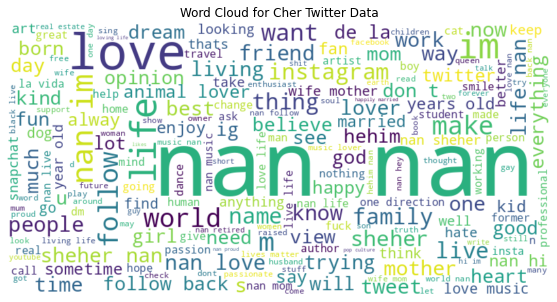

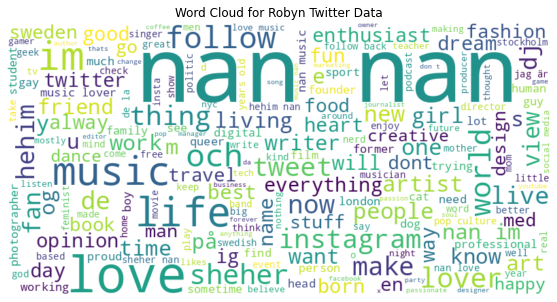

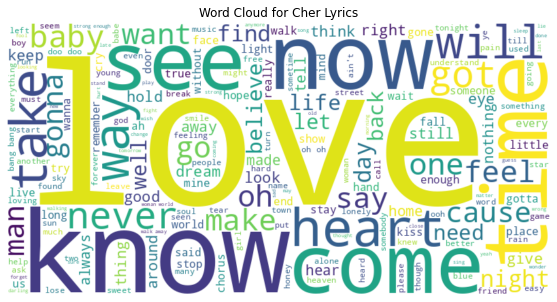

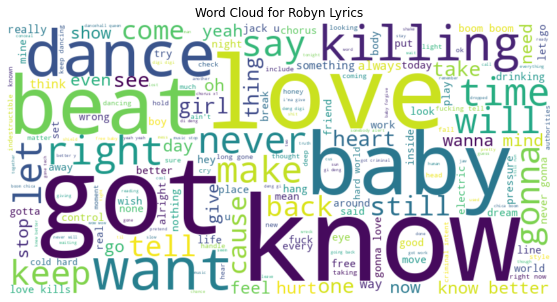

In [36]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Sample tokenize and normalize function (you can replace it with your actual function)
def tokenize_and_normalize(text):
    if pd.isna(text):
        return []
    tokens = text.lower().split()
    return tokens

# Tokenize and normalize lyrics for Cher and Robyn
cher_lyrics = combined_lyrics[combined_lyrics['Artist'] == 'Cher']['Lyrics'].to_dict()
robyn_lyrics = combined_lyrics[combined_lyrics['Artist'] == 'Robyn']['Lyrics'].to_dict()

cher_tokens = []
robyn_tokens = []

for lyrics in cher_lyrics.values():
    cher_tokens.extend(tokenize_and_normalize(lyrics))
for lyrics in robyn_lyrics.values():
    robyn_tokens.extend(tokenize_and_normalize(lyrics))

# Tokenize and normalize Twitter data for Cher and Robyn
twitter_cher_tokens = []
twitter_robyn_tokens = []

for index, row in twitter_data.iterrows():
    tokens = tokenize_and_normalize(row['tokens'])
    if row['artist'] == 'cher':
        twitter_cher_tokens.extend(tokens)
    elif row['artist'] == 'robyn':
        twitter_robyn_tokens.extend(tokens)

# Create word clouds
def create_wordcloud(tokens, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each dataset
create_wordcloud(twitter_cher_tokens, "Word Cloud for Cher Twitter Data")
create_wordcloud(twitter_robyn_tokens, "Word Cloud for Robyn Twitter Data")
create_wordcloud(cher_tokens, "Word Cloud for Cher Lyrics")
create_wordcloud(robyn_tokens, "Word Cloud for Robyn Lyrics")



Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: It sort of reiterates a lot of what we already know. I should have removed NaNs actually, as these are showing up in the twitter data. Beyond that, twitter often have music and travel and love and art in it, showing their lifestyles. They both like lyrics above love,and use baby a lot. Killing showed up a lot in Robyn, which interesting? Overall, we get the impression the songs are about romance and emotional feelings. 